In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [3]:
# load Data
data = pd.read_csv('/Users/apple/Desktop/reddit_flair/reddit-data-cleaned.csv')

In [3]:
data

,title,score,body,url,num_comments,comments,flair,id
0,untouchability even quarantine never take food...,54,NaN,india coronavirus outbreak untouchability even...,7,let feel hungry couple day max week care cook ...,Scheduled,fzvwz8
1,delhi govt source names cm arvind kejriwal dep...,303,NaN,ani status,30,beyond petty inclusion delhi government school...,Scheduled,f7ogd8
2,delhi ap singh advocate delhi gang rape convic...,18,NaN,ani status,21,hunch guy try expose loophole legal system nev...,Scheduled,flgvah
3,supreme court verdict sc st quota create polit...,109,NaN,scroll article supreme courts verdict sc st qu...,47,muslim reservation two distraction use indian ...,Scheduled,f1o839
4,entrance exam schedule may,12,"CLAT, AILET, NEET, JEE have been postponed bu...",india comments fvcvo entrance exams scheduled may,3,bachega india tabhi toh padhega india gand mar...,Scheduled,fvcvo1
5,advisory schedule international mercial passen...,35,NaN,pib india status,4,oh boy chalo bhaisahab sabji ka dukaan main da...,Scheduled,fl8zf5
6,roommate india indian american citizen schedul...,27,He was working remotely from February 24th and...,india comments fhgyhu roommate india hes indian,4,afaik still ban entry indian citizen issue che...,Scheduled,fhgyhu
7,ministry score fund utilisation schedule caste,47,NaN,news politics nation ministry scores fund util...,1,fund sanskrit university public money public w...,Scheduled,fg8v3u
8,hydroxychloroquine schedule drug sell prescrip...,26,NaN,mohfw gov,4,someone give eli drug use delete,Scheduled,fpr0on
9,maharashtra govt school urban area maharashtra...,31,NaN,ani status,4,bc student immune virus fuck dickhead indian f...,Scheduled,fii4k1


# 1. Bag of words Model on conventional ML algorithms

We cannot input text directly to machine learning models. We need to convert the text to a vector of numbers, this step is called Feature extraction

For this we are going to use B.O.W (Bag of words) model, It focuses only on the occurence of words. The sentence structure, context, order of words is lost in B.O.W model.

First we will convert each document in corpus to TF-IDF vector

We will input these vectors to Machine Learning models like Naive-Bayes, Support-Vector-Machine, Logistic-Regression, Random-Forest

# Preparing data for model

It is possible that some features from the dataset may perform better than others. For instance, Only using Title for our model may give better accuracy than using only url, or maybe a combination of such features might result in a better accuracy.

This is hard to guess at the moment, so I plan to try out different combinations of inputs from the dataset to get the best accuracy:- Title, url, comments, (Title + url + comments), (Title + url) , etc.

Lets see which performs the best, we will use those features in our final model.

In [8]:
def prepare_data(columns):
    # Prepares Train and test sets for models
        
    if len(columns) > 2:
        df = data[columns].fillna("")
        columns.remove('flair')
        X = df[columns].apply(lambda x : ' '.join(x),axis = 1)                     
       
    else :
        df = data[columns].dropna()
        X = df[columns[0]]
        
    X = X.values          # X - input
    
    le = LabelEncoder()
    Y = le.fit_transform(df['flair'])    # Y - target_labels
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)   # ( 85 : 15 )
    return (X_train, X_test, y_train, y_test)

In [9]:
# Extracting 'Title' from dataset
(X_train, X_test, y_train, y_test) = prepare_data(['title','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1891,)
y_train shape  =  (1891,)
X_test shape  =  (334,)
y_test shape  =  (334,)


# Data is ready now we'll apply it to different classifiers

Linear SVC

Naive - Bayes

Logistic Regression

Random Forest classifier

In [6]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.2)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 0.9)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100,max_depth=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        # tf-idf vectorisation
                    (clf[0],clf[1])                                            # estimator
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')


LinearSVC   ----->   0.6586826347305389

Naive - Bayes   ----->   0.6167664670658682



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression   ----->   0.6616766467065869

Random Forest Classifier   ----->   0.6377245508982036



In [7]:
print(y_test)
print(predicted)

[ 7  7  9  7 10  4  9 10  5  0  7  5  4  7  5  7  2  5  7  5  8  9  7  5
  8 10  5  9  6  9  4  0  1  5  8  7  7  9  1  4  3 10  7  4  2  2  2  7
  7  2  5  7  0  8  5  0  0  0  8  7  8  5  5  7  4  6  7  8  0  9  0  0
  3  4  7  9  4  6  8  8  9  9  8  5  6  9  9 10  5  4  4  7  0  8  4  7
  6  6  8  0  7 10  3  8 10 10  4  3  5 10  7  2  5  8 10 10  5  6  5 10
  5  0  8  0  2  1  2  5  7  5  4  5  6 10  4  0  7  8  6  1  2  7 10  8
  2  6  2  7  7  0  4  6  7  1  1  9  4  6  8  5  3  5  7  0  2  5  8  2
  3  5  0  9  2  5  9  3  0 10  7  4 10  4  8  0  2  4  5  4  2  8  8 10
  6  1  1  5 10  0  4  2 10  5  8  2  7 10 10  0 10  9  4  0  1  6  4  0
  2  1  7  2  8  7  7  6  0  0  0  0  8  6  9  4  6  0  1  9  5  8  2  7
  9  5  0  4  8  7  8  7  9  8 10  4  2  7  5  9  5  4  4  9  0  2  8  5
  4  5  0  4  7  5  5  7  8  6  7  4  5 10  2  7  8  1  7  7  5  1  0  9
  7  1  8  2  8  6  0  7  8  1  7  2  4  0  1  0  9  5  8  6  2  7  4  8
  4  1  1  1  4  7  4  4  0  1  3  8  5  7  7  2  4

# URL

In [8]:
# Extracting url column from dataset
(X_train, X_test, y_train, y_test) = prepare_data(['url','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1889,)
y_train shape  =  (1889,)
X_test shape  =  (334,)
y_test shape  =  (334,)


In [9]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.7)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 25,solver='saga',penalty='l1',multi_class='multinomial')) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100,max_depth=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.4940119760479042

Naive - Bayes   ----->   0.4281437125748503



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression   ----->   0.49700598802395207

Random Forest Classifier   ----->   0.47305389221556887



# Comments

In [10]:
(X_train, X_test, y_train, y_test) = prepare_data(['comments','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1677,)
y_train shape  =  (1677,)
X_test shape  =  (297,)
y_test shape  =  (297,)


In [ ]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=1)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 10)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.47474747474747475

Naive - Bayes   ----->   0.3872053872053872



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression   ----->   0.47474747474747475



# Title + url

In [ ]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','url','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

In [22]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.7)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 0.9)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.6616766467065869

Naive - Bayes   ----->   0.6167664670658682



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression   ----->   0.6826347305389222

Random Forest Classifier   ----->   0.6467065868263473



# Title + comments

In [23]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','comments','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1891,)
y_train shape  =  (1891,)
X_test shape  =  (334,)
y_test shape  =  (334,)


In [24]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.6)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 9,max_iter = 150)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.7125748502994012

Naive - Bayes   ----->   0.5239520958083832



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression   ----->   0.6976047904191617

Random Forest Classifier   ----->   0.6796407185628742



# Title + body

In [25]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','body','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1891,)
y_train shape  =  (1891,)
X_test shape  =  (334,)
y_test shape  =  (334,)


In [26]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.7)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 9,max_iter = 200)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.7275449101796407

Naive - Bayes   ----->   0.5299401197604791



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression   ----->   0.7005988023952096

Random Forest Classifier   ----->   0.6047904191616766



# Title + comments + url

In [27]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','url','comments','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1891,)
y_train shape  =  (1891,)
X_test shape  =  (334,)
y_test shape  =  (334,)


In [31]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=3)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 9,max_iter = 150)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.7395209580838323

Naive - Bayes   ----->   0.5538922155688623



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression   ----->   0.718562874251497

Random Forest Classifier   ----->   0.6047904191616766



# Title + body + url

In [32]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','body','url','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1891,)
y_train shape  =  (1891,)
X_test shape  =  (334,)
y_test shape  =  (334,)


In [33]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.7)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 9,max_iter = 200)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test) 
    accuracy = np.sum(predicted == y_test)/len(y_test) # t = b = u
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.7455089820359282

Naive - Bayes   ----->   0.5538922155688623



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression   ----->   0.718562874251497

Random Forest Classifier   ----->   0.5748502994011976



# Deep Learning Models

We will be considering the following deep learning methods for text classification

CNN + Word Embeddings

LSTMs

Stacked LSTMS

Bidirectional LSTMs

Hybrid Model --> (CNN + LSTM)

In [4]:
# Creating embeddings dictionary
embeddings_dict = {}
with open('/Users/apple/Desktop/reddit_flair/glove.6B.50d.txt') as f: 
    for line in f:
        word = line.split()[0]
        embeddings_dict[word] = np.array(line.split()[1:],dtype = 'float')

In [5]:
def create_data_for_model(max_len , vocab_size = 'None'):
      (X_train, X_test, y_train, y_test) = prepare_data(['title','body','url','flair'])
      tk = Tokenizer()
      tk.fit_on_texts(X_train)
      if vocab_size != 'None':
        tk.word_index = {w:i for w,i in tk.word_index.items() if i <= vocab_size}
      else:
        vocab_size = len(tk.word_index)

      # Train Data - X
      encoded_train = tk.texts_to_sequences(X_train)
      padded_train = pad_sequences(encoded_train,maxlen = max_len, padding = 'post' , truncating = 'post')

      # Test Data  - X
      encoded_test = tk.texts_to_sequences(X_test)
      padded_test = pad_sequences(encoded_test,maxlen = max_len,padding = 'post', truncating = 'post')

      # Train Data - Y
      one_hot = OneHotEncoder()
      y_train = y_train.reshape((-1,1))
      y_train = one_hot.fit_transform(y_train).toarray()

      # Create embeddings matrix
      embeddings_matrix = np.zeros((vocab_size+1,50)) 
      for word,index in tk.word_index.items():
        if embeddings_dict.get(word) is not None:
          embeddings_matrix[index] = embeddings_dict[word]
     
      return (padded_train, y_train, padded_test, y_test, embeddings_matrix, vocab_size)

def give_accuracy(model,x_test,y_test,name):
    predicted = model.predict(padded_test)
    predicted_labels = np.argmax(predicted,axis = 1)
    accuracy = np.sum(predicted_labels == y_test)/len(y_test)
    print("Accuracy of " + str(name) + " model ---> ", accuracy)

# CNN + Word Embeddings


(Yoav Goldberg, in his primer on deep learning for nlp, 2015) , comments that CNNs are effective at Text Classification because of their capability to extract important features (like tokens or sequence of tokens) regardless of their position in text.

He also comments, in text classification, the main idea is to learn words or a group of words that are good indicators of a topic, we do not necessarily care where they might appear in a document. Convolutions and pooling layers allow model to learn such local indicators invariant to their position.

For each training example, we will extract word embedding vectors (Glove vectors).

We will feed this as input to CNN model, Our hope is that CNN model will learn some useful filters. A useful filter might be one , that has a similar embedding vector to the vector of a distinguishing word.

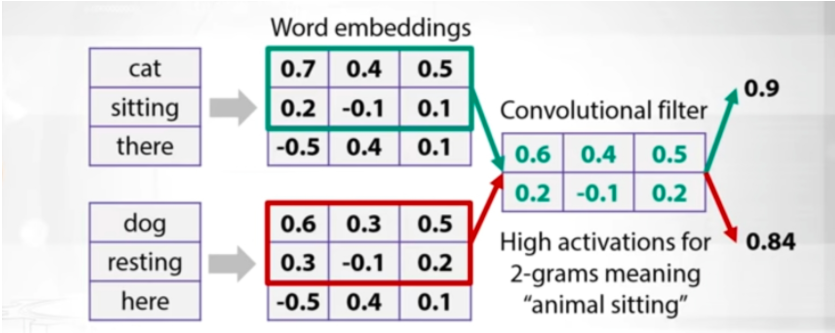

In [8]:
from IPython.display import Image
Image(filename="/Users/apple/Desktop/ml projects/CNN.png")

In the image above, the filter has very similar weights to the bigram --> cat sitting. Therefore it gives a high activation.

In the next sentence it also give a high activation because the cosine distance between the vectors cat-dog and sitting-resting is very small. This is the reason to use word embeddings, they provide us with similar representations for similar words.

So, the result is that we have learnt a filter that will give high activation whenever it comes across a bigram that means "animal resting". Such filters help in extracting general meanings from text

They can be used by the model to understand what our text conveys, and consequently give correct output

In [10]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix, vocab_len) = create_data_for_model(max_len = 300)
def create_cnn_model(max_len, vocab_size):  
  pooling_layers = []
  inp = Input((max_len,))
  embedding_layer = Embedding(input_dim= vocab_size + 1,output_dim=50,weights = [embeddings_matrix],trainable = True)(inp)
  dp = Dropout(0.3)(embedding_layer)

  x1 = Conv1D(filters=36,kernel_size=1,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len ,stride = 1)(x1))

  x2 = Conv1D(filters=36,kernel_size=2,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 1,stride = 1)(x2))

  x3 = Conv1D(filters=36,kernel_size=3,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 2,stride = 1)(x3))

  x4 = Conv1D(filters=36,kernel_size=4,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 3,stride = 1)(x4))

  x5 = Conv1D(filters=36,kernel_size=5,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 4,stride = 1)(x5))

  z = Concatenate(axis = 1)(pooling_layers)
  z = Flatten()(z)
  z = Dropout(0.2)(z)

  
  #y = Dense(16,activation = 'relu')(z)

  out = Dense(11,activation = 'softmax')(z)


  model = Model(inputs = inp,outputs = out)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
cnn_model = create_cnn_model(max_len = 300,vocab_size = vocab_len)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 50)      1418600     input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 300, 50)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 300, 36)      1836        dropout_1[0][0]                  
____________________________________________________________________________________________

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=300, strides=1)`
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=299, strides=1)`
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=298, strides=1)`
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=297, strides=1)`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/sit

In [11]:
history = cnn_model.fit(padded_train,y_train, epochs = 65, batch_size = 32, validation_split = 0.15)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1607 samples, validate on 284 samples
Epoch 1/65
1607/1607 [==============================] - 6s 4ms/step - loss: 3.0914 - accuracy: 0.1350 - val_loss: 1.9487 - val_accuracy: 0.3310
Epoch 2/65
1607/1607 [==============================] - 5s 3ms/step - loss: 2.3384 - accuracy: 0.2645 - val_loss: 1.5933 - val_accuracy: 0.4965
Epoch 3/65
1607/1607 [==============================] - 6s 4ms/step - loss: 1.9206 - accuracy: 0.3927 - val_loss: 1.3383 - val_accuracy: 0.6268
Epoch 4/65
1607/1607 [==============================] - 5s 3ms/step - loss: 1.6359 - accuracy: 0.4711 - val_loss: 1.1566 - val_accuracy: 0.6972
Epoch 5/65
1607/1607 [==============================] - 5s 3ms/step - loss: 1.3633 - accuracy: 0.5600 - val_loss: 0.9990 - val_accuracy: 0.7430
Epoch 6/65
1607/1607 [==============================] - 5s 3ms/step - loss: 1.1612 - accuracy: 0.6297 - val_loss: 0.8815 - val_accuracy: 0.7606
Epoch 7/65
1607/1607 [==============================] - 5s 3ms/step - loss: 1.0303 - accu

In [12]:
give_accuracy(cnn_model,padded_test, y_test, "CNN")

Accuracy of CNN model --->  0.7874251497005988


In [13]:
from sklearn.externals import joblib

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
joblib.dump(cnn_model,"model.pkl")

['model.pkl']

In [15]:
m = joblib.load("model.pkl")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [14]:
cnn_model.save("model_CNN.h5")

In [ ]:
cnn_model.save_weights('/Users/apple/Desktop/ml projects/model_weights/model_CNN.h5')

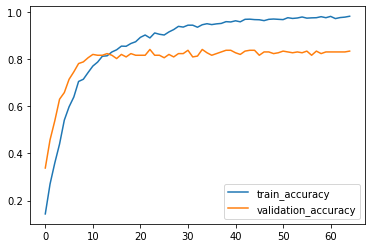

In [46]:
plt.plot(history.history['accuracy'],label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

# LSTM

The idea behind using LSTMs is to capture context and the order of text.

LSTMs can remember past information using hidden states and apply it to current task

Consider a sentence --> The movie was not good, even though everyone was claiming it to be awesome, brilliant, extraordinary!

To detect sentiment of this text, if we apply a CNN or linear classifier, it may predict that text is positive base on the words - good, awesome, brilliant, extraordinary

But a LSTM might be able to recognize that due to the presence of 'not good' , 'even though' our sentence is actually negative

LSTMs are slow to train so I will set max_len = median length of texts

In [47]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix, vocab_len) = create_data_for_model(max_len = 35) # taking max_len = median

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [48]:
# Model
def model_lstm(max_len,vocab_size):
  inp1 = Input((max_len,))
  embedding_layer = Embedding(input_dim=vocab_size + 1,output_dim= 50,mask_zero=True,weights = [embeddings_matrix],trainable = False)(inp1)
  drop_out1 = Dropout(0.3)(embedding_layer)
  lstm_layer1 = LSTM(100,return_sequences = False)(drop_out1)


  #drop_out = Dropout(0.3)(lstm_layer1)
  out1 = Dense(11,activation='softmax')(lstm_layer1)

  model_lstm = Model(inputs = inp1,outputs = out1)
  model_lstm.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model_lstm.summary()
  return model_lstm

In [49]:
lstm_model = model_lstm(max_len = 35,vocab_size=vocab_len)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 35)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 35, 50)            1418600   
_________________________________________________________________
dropout_3 (Dropout)          (None, 35, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1111      
Total params: 1,480,111
Trainable params: 61,511
Non-trainable params: 1,418,600
_________________________________________________________________


In [50]:
hist = lstm_model.fit(padded_train,y_train,epochs = 40, batch_size=8,validation_split = 0.15)

Train on 1607 samples, validate on 284 samples
Epoch 1/40
1607/1607 [==============================] - 8s 5ms/step - loss: 2.0075 - accuracy: 0.3261 - val_loss: 1.7460 - val_accuracy: 0.3944
Epoch 2/40
1607/1607 [==============================] - 9s 6ms/step - loss: 1.5326 - accuracy: 0.4966 - val_loss: 1.4992 - val_accuracy: 0.5387
Epoch 3/40
1607/1607 [==============================] - 8s 5ms/step - loss: 1.3886 - accuracy: 0.5414 - val_loss: 1.4938 - val_accuracy: 0.5563
Epoch 4/40
1607/1607 [==============================] - 6s 4ms/step - loss: 1.2716 - accuracy: 0.5924 - val_loss: 1.3291 - val_accuracy: 0.5951
Epoch 5/40
1607/1607 [==============================] - 6s 4ms/step - loss: 1.1487 - accuracy: 0.6254 - val_loss: 1.3678 - val_accuracy: 0.5669
Epoch 6/40
1607/1607 [==============================] - 6s 4ms/step - loss: 1.0779 - accuracy: 0.6559 - val_loss: 1.2370 - val_accuracy: 0.6268
Epoch 7/40
1607/1607 [==============================] - 6s 4ms/step - loss: 0.9690 - accu

In [51]:
give_accuracy(lstm_model, padded_test, y_test, "LSTM")

Accuracy of LSTM model --->  0.6047904191616766


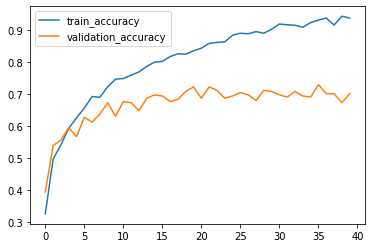

In [52]:
plt.plot(hist.history['accuracy'],label = 'train_accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

# Bidirectional LSTM

The intuition behind using Bidirectional LSTMs is that they learn contextual information from both directions. This may help model to predict better outputs for text classification

In [53]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix, vocab_len) = create_data_for_model(max_len = 35)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [54]:
def create_biLSTM_model(max_len,vocab_size):
  inp1 = Input((max_len,))
  embedding_layer = Embedding(input_dim=vocab_size + 1,output_dim= 50,mask_zero=True,weights = [embeddings_matrix],trainable = True)(inp1)
  drop_out1 = Dropout(0.3)(embedding_layer)
  lstm_layer1 = Bidirectional(LSTM(100,return_sequences = False))(drop_out1)


  #drop_out = Dropout(0.3)(lstm_layer1)
  out1 = Dense(11,activation='softmax')(lstm_layer1)

  model_bi_lstm = Model(inputs = inp1,outputs = out1)
  model_bi_lstm.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model_bi_lstm.summary()
  return model_bi_lstm

In [55]:
model_bi_lstm = create_biLSTM_model(max_len = 35, vocab_size = vocab_len)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 35)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 35, 50)            1418600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 35, 50)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               120800    
_________________________________________________________________
dense_3 (Dense)              (None, 11)                2211      
Total params: 1,541,611
Trainable params: 1,541,611
Non-trainable params: 0
_________________________________________________________________


In [56]:
hist = model_bi_lstm.fit(padded_train,y_train,epochs = 40, batch_size=16,validation_split = 0.15)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1607 samples, validate on 284 samples
Epoch 1/40
1607/1607 [==============================] - 10s 6ms/step - loss: 1.9127 - accuracy: 0.3715 - val_loss: 1.4821 - val_accuracy: 0.5634
Epoch 2/40
1607/1607 [==============================] - 9s 5ms/step - loss: 1.2683 - accuracy: 0.6061 - val_loss: 1.1836 - val_accuracy: 0.6444
Epoch 3/40
1607/1607 [==============================] - 7s 5ms/step - loss: 0.9834 - accuracy: 0.6926 - val_loss: 1.1180 - val_accuracy: 0.6655
Epoch 4/40
1607/1607 [==============================] - 12s 7ms/step - loss: 0.8020 - accuracy: 0.7430 - val_loss: 1.0202 - val_accuracy: 0.6972
Epoch 5/40
1607/1607 [==============================] - 11s 7ms/step - loss: 0.6634 - accuracy: 0.7853 - val_loss: 1.0246 - val_accuracy: 0.7077
Epoch 6/40
1607/1607 [==============================] - 11s 7ms/step - loss: 0.5528 - accuracy: 0.8227 - val_loss: 0.9638 - val_accuracy: 0.7113
Epoch 7/40
1607/1607 [==============================] - 10s 6ms/step - loss: 0.4554 -

In [57]:
give_accuracy(model_bi_lstm, padded_test, y_test, "Bidirectional_LSTM")

Accuracy of Bidirectional_LSTM model --->  0.625748502994012


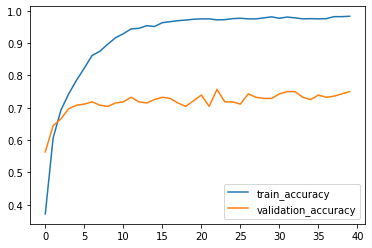

In [58]:
plt.plot(hist.history['accuracy'],label = 'train_accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

# Hybrid - CNN + LSTM

In [59]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix,vocab_len) = create_data_for_model(max_len = 35)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [60]:
def create_hybrid_model(max_len,vocab_size):

  pooling_layers = []


  inp1 = Input((max_len,))
  embedding_layer = Embedding(input_dim=vocab_size + 1,output_dim= 50,mask_zero=False,weights = [embeddings_matrix],trainable = True)(inp1)
  dp = Dropout(0.3)(embedding_layer)

  x1 = Conv1D(filters=36,kernel_size=1,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 19,stride = 1)(x1))

  x2 = Conv1D(filters=36,kernel_size=2,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 20,stride = 1)(x2))

  x3 = Conv1D(filters=36,kernel_size=3,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 21,stride = 1)(x3))

  z = Concatenate(axis = 2)(pooling_layers)
  drop_out = Dropout(0.3)(z)

  lstm_layer1 = (LSTM(100,return_sequences = False))(drop_out)


  drop_out = Dropout(0.3)(lstm_layer1)
  out1 = Dense(11,activation='softmax')(lstm_layer1)

  hybrid_model = Model(inputs = inp1,outputs = out1)
  hybrid_model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  hybrid_model.summary()
  return hybrid_model

In [61]:
hybrid_model = create_hybrid_model(35,vocab_size=vocab_len)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=16, strides=1)`
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=15, strides=1)`
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=14, strides=1)`


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 35, 50)       1418600     input_4[0][0]                    
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 35, 50)       0           embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 35, 36)       1836        dropout_5[0][0]                  
____________________________________________________________________________________________

In [62]:
hist = hybrid_model.fit(padded_train,y_train,epochs = 35, batch_size=8,validation_split = 0.15)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1607 samples, validate on 284 samples
Epoch 1/35
1607/1607 [==============================] - 10s 6ms/step - loss: 2.2876 - accuracy: 0.1680 - val_loss: 2.1870 - val_accuracy: 0.2113
Epoch 2/35
1607/1607 [==============================] - 9s 6ms/step - loss: 2.0985 - accuracy: 0.2663 - val_loss: 1.9595 - val_accuracy: 0.3310
Epoch 3/35
1607/1607 [==============================] - 9s 6ms/step - loss: 1.8298 - accuracy: 0.3815 - val_loss: 1.7481 - val_accuracy: 0.3873
Epoch 4/35
1607/1607 [==============================] - 9s 6ms/step - loss: 1.5779 - accuracy: 0.4835 - val_loss: 1.4941 - val_accuracy: 0.5141
Epoch 5/35
1607/1607 [==============================] - 9s 6ms/step - loss: 1.3687 - accuracy: 0.5507 - val_loss: 1.3520 - val_accuracy: 0.5951
Epoch 6/35
1607/1607 [==============================] - 9s 6ms/step - loss: 1.1818 - accuracy: 0.6192 - val_loss: 1.2178 - val_accuracy: 0.6268
Epoch 7/35
1607/1607 [==============================] - 9s 6ms/step - loss: 1.0422 - acc

In [63]:
give_accuracy(hybrid_model,padded_test,y_test,"Hybrid Model")

Accuracy of Hybrid Model model --->  0.6736526946107785
